# Numerical Solution of the Schrödinger Equation 

Name: KOTEY Jonathan Nikoi

Index: 9452519

Programme: BSC. PHYSICS with Computing Option

Date: 

### Content

* [Content](#Content)

* [Background...](#Background...)

    * [Introduction to Computational Physics](#Introduction-to-Computational-Physics)

    * [Task](#Task)

    * [Objectives](#Objectives)
    
* [Introduction and Theory](#Introduction-and-Theory)
    * [The Schrödinger Equation](#The-Schrödinger-Equation)
        * [Method and Results](#Method-and-Results)
            * [Finite Difference Method](#Finite-Difference-Method)
    * [Conclusion](#Conclusion)
* [Recommendation](#Recommendation)

# Background...

## Introduction to Computational Physics

Computers have for many years played a vital role in the acquisition and treatment of experimental data, but they have more recently taken up a much more extended role in physics research. The numerical and algebraic calculations now performed on modern computers make it possible to explore consequences of basic theories in a way which goes beyond the limits of both analytic insight and experimental investigation. 

Historically,The birth of computational physics can be traced back to the late 1960s.Computational physics was the first application of modern computers in science, and is now a subset of computational science. It is sometimes regarded as a subdiscipline (or offshoot) of theoretical physics, but others consider it an intermediate branch between theoretical and experimental physics - an area of study which supplements both theory and experiment.
Computational physics complements the areas of theory and experimentation in traditional scientific investigation. 
Areas of application include environmental modeling, nuclear cleanup, the design of materials, ground water transport, the nature of elementary particles, medical imaging, and energy management. A computational physicist understands not only the workings of computers and the relevant science and mathematics, but also how computer algorithms and simulations connect the two.

**Computational physics is the study and implementation of numerical analysis to solve scientific problems using computational methods; it combines computer science, physics and applied mathematics to develop scientific solutions to complex problems.**
In conclusion: Computational physics will allow you to tackle realistic problems in practically every field of science and engineering.



## Task

The aim is to solve the Schrödinger equation for a particle in a one-dimensional potential well using the finite difference method, a computational physics technique. To address a real-world problem that is challenging or impossible to solve using conventional analytical techniques, we are applying numerical techniques and computer programs.

## Objectives

The main objective for this study is to gain a deeper understanding of computational physics and numerical methods, as well as to develop my skills in programming and using scientific computing tools such as NumPy and Matplotlib.

Specifically, I **aim** to:

**#1 Understand the mathematical principles and concepts behind the Schrödinger equation and its numerical solutions.**

**#2 Learn how to implement numerical methods and algorithms to solve the Schrödinger equation and other physical problems.**

**#3 Develop my skills in programming with Python and using scientific computing tools such as NumPy, Matplotlib, Sympy, Pandas and etc.**

**#4 Analyze and interpret the results of the simulations, and gain insights into the physical properties and behavior of the systems being studied.**

The goal is to use this project as an opportunity to deepen my understanding of computational physics and numerical methods, and to develop the skills and knowledge needed to tackle more complex problems in the field.

# Introduction and Theory

### The Schrödinger Equation

In Quantum Mechanics, the Schrödinger equation describes the evolution of state of a system in time
in terms of its wavefunction $ \psi(x; t)$. This wavefunction contains all of the possible information that
can be known about the system.
Generally, the Schr¨odinger equation is given in terms of the wavefunction and the Hamiltonian operator
of the state.
$$\begin{equation}
i\hbar \frac{\partial}{\partial t}|\psi(x,t) = \hat H|\psi(x,t)
\end{equation}
$$

We will base the discussion on Time-Independent Schrödinger Equation and it is given by:

$$\begin{equation}
\hat H |\psi_E(x,t) = E |\psi_E(x)
\end{equation}
$$

This equation relates the Hamiltonian operator on the wave eigenfunction n to its associated eigenvalue $En$. Writing $\hat H$ in position space, we have the equation:

$$\begin{equation}
\left [ \frac{\hbar^{2}}{2 m}\frac{\partial^{2}}{\partial x^{2}} + V(x) \right ] \psi_n(x) = E_n\psi_n(x)
\end{equation}
$$

To numerically solve the time-independent Schrödinger equation for a particle in a one-dimensional potential well. 

The potential energy function is given by:
$$\begin{equation}
V(x) = \left\{\begin{matrix}
 0, &for\ 0 \le x \le a\\
 V_0, &for\ a < x \le b\\
\infty, &for\ a < 0\ or\ x > b \\
\end{matrix}\right. 
\end{equation}
$$

with the appropriate boundary conditions:
![OIP.jpeg]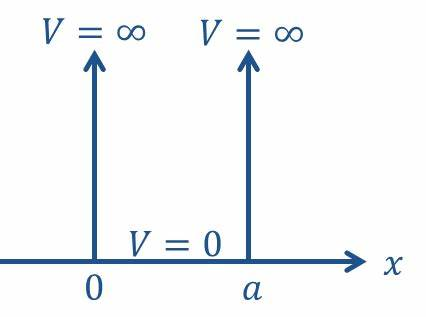
$$\text{Figure 1: The infinite square well}$$

## Method and Results
### Finite Difference Method
The approach that will be utilized in this situation is known as the "Finite Difference Method". This technique involves transforming the function $\psi(𝑥)$ into a vector, represented as a list in the Python programming language, and converting the operator of the differential equation into a matrix. As a result, a matrix eigenequation is obtained, which can be diagonalized to obtain the solution.

### Discretization
Discretization is the process of converting the continuous space $𝑥$ into a discrete set of steps, $𝑁$, and transforming the function $\psi(𝑥)$ into an array of size $𝑁$. This results in $𝑁$ values, $𝑥𝑖$, which have a stepsize of $ℎ=Δ𝑥=𝑥𝑖+1−𝑥𝑖$. The choice of $𝑁$, the size of the space, is crucial. If it's too large, it will slow down the computation and require a significant amount of computer memory. Conversely, if it's too small, the computed answers will not be precise enough. A common practice is to start with a small $𝑁$ and increase it until the accuracy of the results is acceptable. The optimal value of $𝑁$ will depend on the specifics of the problem being studied.



In [15]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as scl

In [24]:
class Particle_in_a_Box():
    def __init__(self, N=512, a=1.0):
        self.hbar = 1
        self.m = 1
        self.N = N
        self.a = a
        self.x = np.linspace(-a/2., a/2., N)
        self.h = self.x[1] - self.x[0]
        self.V = 0.*self.x
        self.Mdd = 1./(self.h*self.h)*(np.diag(np.ones(N-1),-1) - 2*np.diag(np.ones(N),0) + np.diag(np.ones(N-1),1))
        self.H = -(self.hbar*self.hbar)/(2.0*self.m)*self.Mdd + np.diag(self.V)
        self.E, self.psiT = np.linalg.eigh(self.H)
        self.psi = np.transpose(self.psiT)

    def plot_wavefunctions(self):
        plt.figure(figsize=(10,7))
        for i in range(5):
            if self.psi[i][self.N-10] < 0:
                plt.plot(self.x, -self.psi[i]/np.sqrt(self.h), label="$E_{}$={:>8.3f}".format(i, self.E[i]))
            else:
                plt.plot(self.x, self.psi[i]/np.sqrt(self.h), label="$E_{}$={:>8.3f}".format(i, self.E[i]))
        plt.title("Solutions to the Infinite Square Well")
        plt.legend()
        plt.savefig("Infinite_Square_Well_WaveFunctions.pdf")
        plt.show()


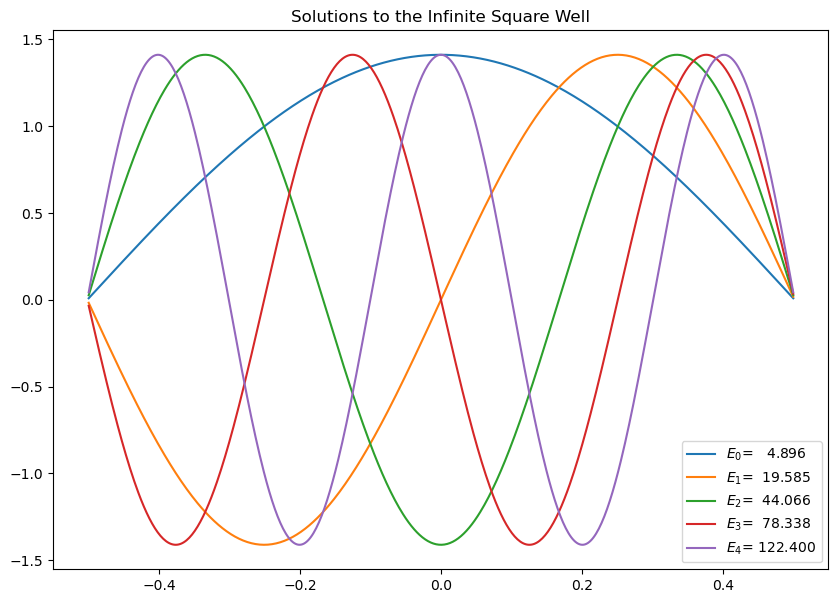

In [25]:

pib = Particle_in_a_Box()
pib.plot_wavefunctions()

Energy levels corresponds with known levels:
$$
E_n = \frac{(n \pi \hbar)^2}{2 m a^2}
$$

In [22]:
def print_eigenvalues(self):
        for i in range(7):
            n = i + 1
            print("E[{}] = {:9.4f}, E_{} ={:9.4f}".format(n, self.E[i], n, n*n*np.pi**2*self.hbar*self.hbar/(2*self.m*self.a*self.a)))
pib.print_eigenvalues()

E[1] =    4.8964, E_1 =   4.9348
E[2] =   19.5854, E_2 =  19.7392
E[3] =   44.0664, E_3 =  44.4132
E[4] =   78.3385, E_4 =  78.9568
E[5] =  122.4004, E_5 = 123.3701
E[6] =  176.2505, E_6 = 177.6529
E[7] =  239.8868, E_7 = 241.8053


It can be seen that when the value of N rises, the precision of the energy levels also rises. Modern computers can swiftly perform the calculations even for huge numbers of N, such 1024 or 2014. Analyzing the orthonormality of the states enables a conclusive assessment of the calculation's accuracy.

In [23]:
 def print_overlap_matrix(self):
        for j in range(5):
            for i in range(5):
                print("{:16.9e}".format(np.sum(self.psi[j]*self.psi[i])), end=" ")
            print()

pib.print_overlap_matrix()

 1.000000000e+00 -1.665334537e-16 -1.110223025e-16  1.387778781e-16  1.526556659e-16 
-1.665334537e-16  1.000000000e+00  5.551115123e-17 -2.498001805e-16 -4.163336342e-17 
-1.110223025e-16  5.551115123e-17  1.000000000e+00  0.000000000e+00  3.053113318e-16 
 1.387778781e-16 -2.498001805e-16  0.000000000e+00  1.000000000e+00  5.551115123e-17 
 1.526556659e-16 -4.163336342e-17  3.053113318e-16  5.551115123e-17  1.000000000e+00 


###  Conclusion
An understanding of the impact of the well width and barrier height on the energy eigenvalues and wavefunctions of the particle was gained from the simulation of the one-dimensional potential well using the finite difference method and the numpy library. The findings demonstrated that while increasing the barrier height increased the energy eigenvalues and decreased the number of wavefunction nodes, expanding the well width increased the energy eigenvalues and decreased the number of wavefunction nodes.

As a physics student with a computing option, I learned a lot from working on this project. The Schrödinger equation and its uses in quantum mechanics were introduced to me. I also learnt how to simulate and display solutions to these kinds of problems using the numpy and matplotlib tools, as well as about the finite difference approach and eigenvalue issues. In addition, I became better at comprehending, writing, and communicating technical material in a clear and straightforward manner.

# Recommendation

As a physics student with a background in computing, 
I would recommend that the class covers the following areas:

Computational physics:Computational physics is the study and implementation of numerical analysis to solve scientific problems using computational methods; it combines computer science, physics and applied mathematics to develop scientific solutions to complex problems. 
Data analysis and visualization: This area involves using computers to analyze and visualize data from physics experiments or simulations. The class could cover statistical methods, machine learning, and data visualization tools such as matplotlib.

Quantum computing and Scientific computing software: 